# Running ordinary least squares regression in TensorFlow

In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline

In [2]:
HR = pd.read_csv(r"D:\Data_sets\HR.csv")

In [3]:
HR # Available @ https://www.kaggle.com/ludobenistant/hr-analytics-1/data

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
5,0.41,0.50,2,153,3,0,1,0,sales,low
6,0.10,0.77,6,247,4,0,1,0,sales,low
7,0.92,0.85,5,259,5,0,1,0,sales,low
8,0.89,1.00,5,224,5,0,1,0,sales,low
9,0.42,0.53,2,142,3,0,1,0,sales,low


In [10]:
X = HR[['average_montly_hours','last_evaluation']].values
y = HR['satisfaction_level'].values

m = X.shape[0]

X = np.c_[np.ones((m,1)), X] #Add bias 

The normal equation (for finding the best estimated coefficients in linear regression): $\hat{\theta} = (\mathbf{X}^T \cdot \mathbf{X})^{-1} \cdot X^T \cdot y$

In [11]:
X = tf.constant(X, dtype=tf.float32, name="X")
y = tf.constant(y.reshape(-1, 1), dtype=tf.float32, name="y") #y is an array, needs to be a column vector

XT = tf.transpose(X)

theta = tf.matmul(tf.matmul(tf.matrix_inverse(tf.matmul(XT, X)), XT), y)

In [12]:
with tf.Session() as sess:
    theta_value = theta.eval()

In [13]:
theta_value

array([[  5.44390678e-01],
       [ -3.13661876e-04],
       [  1.83640182e-01]], dtype=float32)

In [14]:
with tf.Session() as sess:
    predictions = tf.matmul(X, theta_value).eval()

In [15]:
xs = HR['average_montly_hours'].values
ys = predictions
zs = HR['last_evaluation'].values

true_ys = HR['satisfaction_level'].values

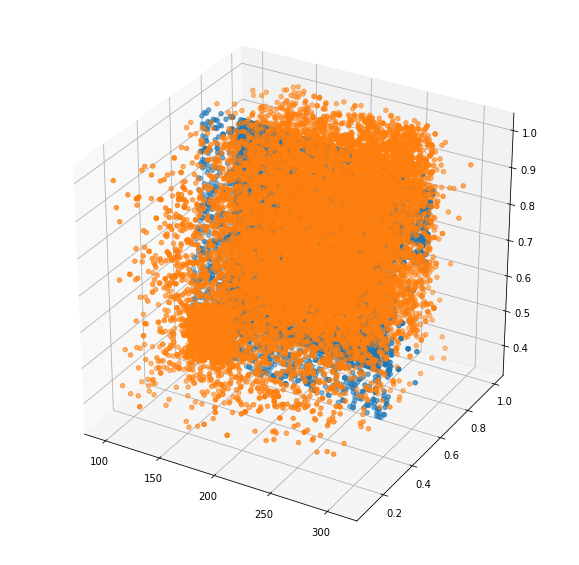

In [21]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(xs, ys, zs,  depthshade=True)
ax.scatter(xs, true_ys, zs, depthshade=True);

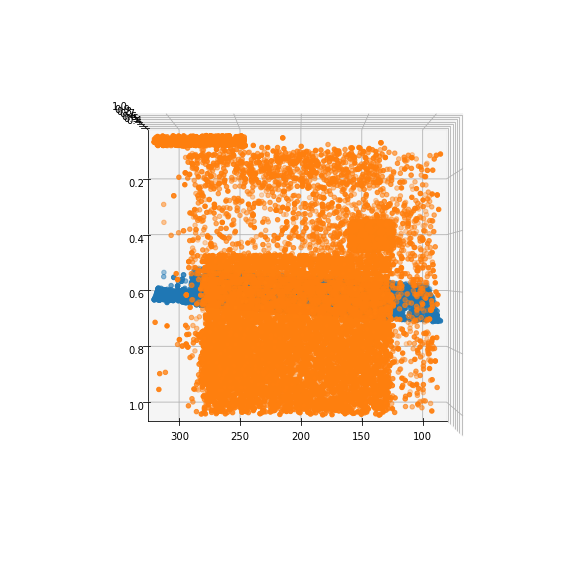

In [22]:
ax.view_init(90, 90)
fig

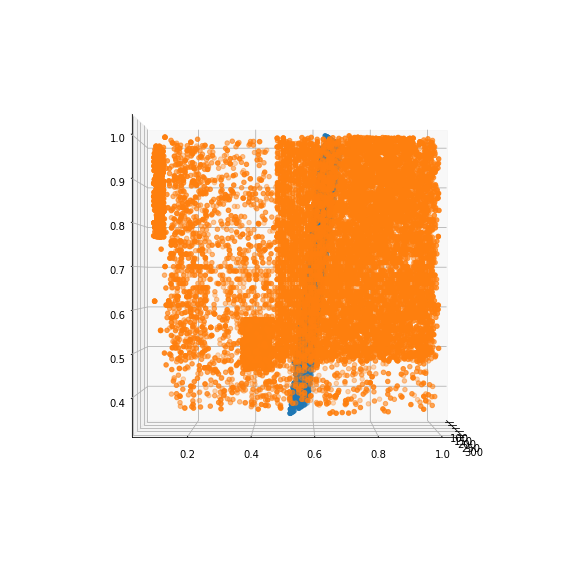

In [23]:
ax.view_init(0, 0)
fig

Not the best model, but an interesting look at how TensorFlow works. 